In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error



In [2]:
df = pd.read_excel("HHwithExog.xlsx")

df

,From Timestamp,HH Electricity (kWh),dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%)
0,2018-01-01 00:00:00,12.80,0,0,1,1,6.4,1.9,82.76
1,2018-01-01 00:30:00,12.30,0,0,1,1,6.4,1.9,82.76
2,2018-01-01 01:00:00,13.50,0,0,1,1,6.6,2.4,80.14
3,2018-01-01 01:30:00,11.90,0,0,1,1,6.6,2.4,80.14
4,2018-01-01 02:00:00,12.80,0,0,1,1,6.1,2.0,84.33
...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,1,0,0,12,6.5,3.3,88.23
35036,2019-12-31 22:00:00,13.81,1,0,0,12,6.6,4.4,87.69
35037,2019-12-31 22:30:00,14.12,1,0,0,12,6.6,4.4,87.69
35038,2019-12-31 23:00:00,14.50,1,0,0,12,6.7,4.1,88.13


Adding past values as new columns by copying the target column and shifting them.

In [3]:
lagNumber = 48

for i in range(lagNumber):
    name = "n-{}.".format(i+1)
    df[name] = df['HH Electricity (kWh)'].shift(i+1)
    
df



,From Timestamp,HH Electricity (kWh),dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%),n-1.,...,n-39.,n-40.,n-41.,n-42.,n-43.,n-44.,n-45.,n-46.,n-47.,n-48.
0,2018-01-01 00:00:00,12.80,0,0,1,1,6.4,1.9,82.76,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:30:00,12.30,0,0,1,1,6.4,1.9,82.76,12.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 01:00:00,13.50,0,0,1,1,6.6,2.4,80.14,12.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 01:30:00,11.90,0,0,1,1,6.6,2.4,80.14,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 02:00:00,12.80,0,0,1,1,6.1,2.0,84.33,11.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,1,0,0,12,6.5,3.3,88.23,15.12,...,13.62,14.12,14.06,14.19,13.50,13.75,14.19,14.00,13.88,14.00
35036,2019-12-31 22:00:00,13.81,1,0,0,12,6.6,4.4,87.69,13.56,...,14.06,13.62,14.12,14.06,14.19,13.50,13.75,14.19,14.00,13.88
35037,2019-12-31 22:30:00,14.12,1,0,0,12,6.6,4.4,87.69,13.81,...,13.94,14.06,13.62,14.12,14.06,14.19,13.50,13.75,14.19,14.00
35038,2019-12-31 23:00:00,14.50,1,0,0,12,6.7,4.1,88.13,14.12,...,14.38,13.94,14.06,13.62,14.12,14.06,14.19,13.50,13.75,14.19


Getting rid of the rows with NaN:

In [4]:
i = list(range(lagNumber))
df = df.drop(i)

df


,From Timestamp,HH Electricity (kWh),dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%),n-1.,...,n-39.,n-40.,n-41.,n-42.,n-43.,n-44.,n-45.,n-46.,n-47.,n-48.
48,2018-01-02 00:00:00,12.40,1,0,0,1,6.4,2.4,78.27,12.40,...,11.90,11.91,13.00,11.90,12.60,12.80,11.90,13.50,12.30,12.80
49,2018-01-02 00:30:00,12.50,1,0,0,1,6.4,2.4,78.27,12.40,...,13.00,11.90,11.91,13.00,11.90,12.60,12.80,11.90,13.50,12.30
50,2018-01-02 01:00:00,12.41,1,0,0,1,5.7,2.1,81.97,12.50,...,13.10,13.00,11.90,11.91,13.00,11.90,12.60,12.80,11.90,13.50
51,2018-01-02 01:30:00,12.30,1,0,0,1,5.7,2.1,81.97,12.41,...,12.90,13.10,13.00,11.90,11.91,13.00,11.90,12.60,12.80,11.90
52,2018-01-02 02:00:00,12.70,1,0,0,1,5.4,2.5,83.40,12.30,...,13.60,12.90,13.10,13.00,11.90,11.91,13.00,11.90,12.60,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,1,0,0,12,6.5,3.3,88.23,15.12,...,13.62,14.12,14.06,14.19,13.50,13.75,14.19,14.00,13.88,14.00
35036,2019-12-31 22:00:00,13.81,1,0,0,12,6.6,4.4,87.69,13.56,...,14.06,13.62,14.12,14.06,14.19,13.50,13.75,14.19,14.00,13.88
35037,2019-12-31 22:30:00,14.12,1,0,0,12,6.6,4.4,87.69,13.81,...,13.94,14.06,13.62,14.12,14.06,14.19,13.50,13.75,14.19,14.00
35038,2019-12-31 23:00:00,14.50,1,0,0,12,6.7,4.1,88.13,14.12,...,14.38,13.94,14.06,13.62,14.12,14.06,14.19,13.50,13.75,14.19


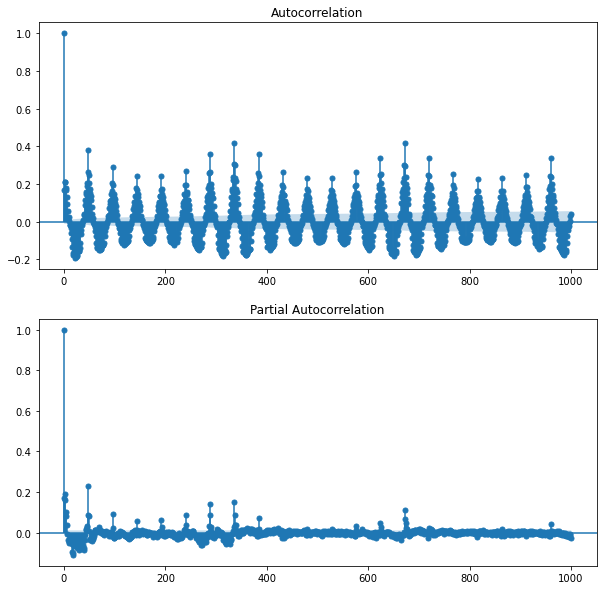

In [28]:
import statsmodels.api as sm

fig,ax = plt.subplots(2,1,figsize=(10,10))
fig = sm.graphics.tsa.plot_acf(df['HH Electricity (kWh)'].diff().dropna(), lags=1000, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df['HH Electricity (kWh)'].diff().dropna(), lags=1000, ax=ax[1])
plt.show()

In [5]:
feature_cols = ['dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']   

for i in range(lagNumber):
    name = "n-{}.".format(i+1)
    feature_cols.append(name)
    
X = df[feature_cols] # Features
y = df['HH Electricity (kWh)'] # Target variable

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split

#X1,X_Validate,y1,y_validate = train_test_split(X,y,test_size=0.2,random_state=42) #split training:testing:validation 60:20:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #split training:testing 75:25

# Random Forest Regressor

##### About the error messages
When using TuneGridSearch we get Fatal error messages. I looked them up and all sources said that they can be ignored.

3.6241165722757667


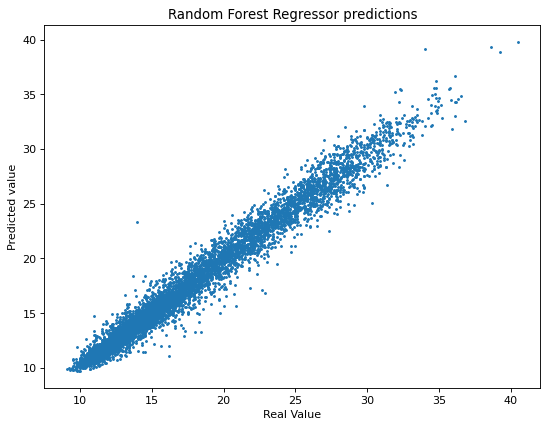

In [6]:
estimator = RandomForestRegressor(n_estimators = 700,  random_state=42).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

RandomForestMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(RandomForestMAPE)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()

In [7]:
import shap

shap.initjs()


In [8]:
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_importance)


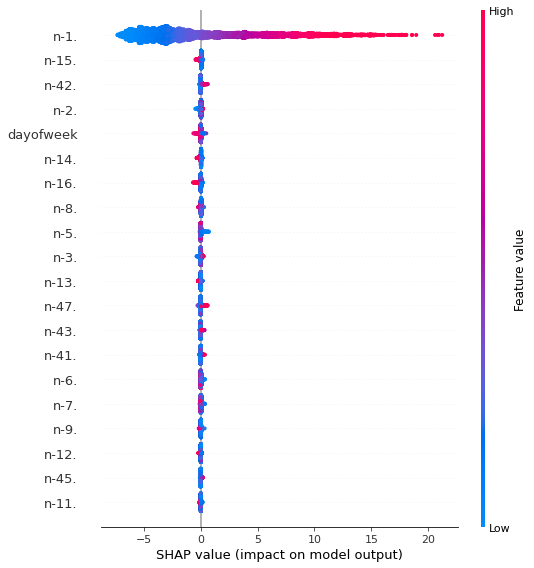

In [9]:
shap.summary_plot(shap_values, X_importance)

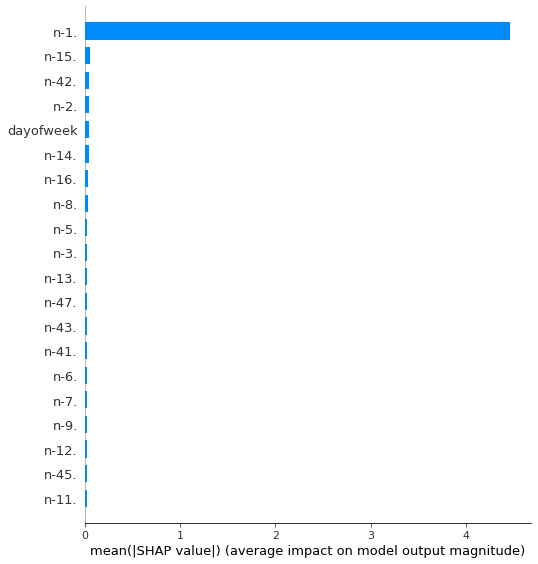

In [10]:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

# New try for forecasting by a day


In [11]:
df = pd.read_excel("HHwithExog.xlsx")

In [12]:
lagNumberStart = 48
lagNumberEnd = 96

for i in range(lagNumberStart-1, lagNumberEnd):
    name = "n-{}.".format(i+1)
    df[name] = df['HH Electricity (kWh)'].shift(i+1)
    
df

,From Timestamp,HH Electricity (kWh),dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%),n-48.,...,n-87.,n-88.,n-89.,n-90.,n-91.,n-92.,n-93.,n-94.,n-95.,n-96.
0,2018-01-01 00:00:00,12.80,0,0,1,1,6.4,1.9,82.76,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:30:00,12.30,0,0,1,1,6.4,1.9,82.76,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 01:00:00,13.50,0,0,1,1,6.6,2.4,80.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 01:30:00,11.90,0,0,1,1,6.6,2.4,80.14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 02:00:00,12.80,0,0,1,1,6.1,2.0,84.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,1,0,0,12,6.5,3.3,88.23,14.00,...,15.19,15.81,15.31,15.06,15.81,16.00,16.12,15.75,16.50,16.31
35036,2019-12-31 22:00:00,13.81,1,0,0,12,6.6,4.4,87.69,13.88,...,15.62,15.19,15.81,15.31,15.06,15.81,16.00,16.12,15.75,16.50
35037,2019-12-31 22:30:00,14.12,1,0,0,12,6.6,4.4,87.69,14.00,...,16.31,15.62,15.19,15.81,15.31,15.06,15.81,16.00,16.12,15.75
35038,2019-12-31 23:00:00,14.50,1,0,0,12,6.7,4.1,88.13,14.19,...,15.00,16.31,15.62,15.19,15.81,15.31,15.06,15.81,16.00,16.12


In [13]:
i = list(range(lagNumberEnd))
df = df.drop(i)

df


,From Timestamp,HH Electricity (kWh),dayofweek,hour,holiday,month,Temperature (C),Feels like (C),Humidity (%),n-48.,...,n-87.,n-88.,n-89.,n-90.,n-91.,n-92.,n-93.,n-94.,n-95.,n-96.
96,2018-01-03 00:00:00,14.10,2,0,0,1,10.8,10.8,79.42,12.40,...,11.90,11.91,13.00,11.90,12.60,12.80,11.90,13.50,12.30,12.80
97,2018-01-03 00:30:00,14.20,2,0,0,1,10.8,10.8,79.42,12.50,...,13.00,11.90,11.91,13.00,11.90,12.60,12.80,11.90,13.50,12.30
98,2018-01-03 01:00:00,13.80,2,0,0,1,10.1,10.1,78.30,12.41,...,13.10,13.00,11.90,11.91,13.00,11.90,12.60,12.80,11.90,13.50
99,2018-01-03 01:30:00,14.00,2,0,0,1,10.1,10.1,78.30,12.30,...,12.90,13.10,13.00,11.90,11.91,13.00,11.90,12.60,12.80,11.90
100,2018-01-03 02:00:00,15.50,2,0,0,1,9.7,5.6,76.36,12.70,...,13.60,12.90,13.10,13.00,11.90,11.91,13.00,11.90,12.60,12.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2019-12-31 21:30:00,13.56,1,0,0,12,6.5,3.3,88.23,14.00,...,15.19,15.81,15.31,15.06,15.81,16.00,16.12,15.75,16.50,16.31
35036,2019-12-31 22:00:00,13.81,1,0,0,12,6.6,4.4,87.69,13.88,...,15.62,15.19,15.81,15.31,15.06,15.81,16.00,16.12,15.75,16.50
35037,2019-12-31 22:30:00,14.12,1,0,0,12,6.6,4.4,87.69,14.00,...,16.31,15.62,15.19,15.81,15.31,15.06,15.81,16.00,16.12,15.75
35038,2019-12-31 23:00:00,14.50,1,0,0,12,6.7,4.1,88.13,14.19,...,15.00,16.31,15.62,15.19,15.81,15.31,15.06,15.81,16.00,16.12


In [15]:
feature_cols = ['dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']   

for i in range(lagNumberStart-1,lagNumberEnd):
    name = "n-{}.".format(i+1)
    feature_cols.append(name)
    
X = df[feature_cols] # Features
y = df['HH Electricity (kWh)'] # Target variable

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split

#X1,X_Validate,y1,y_validate = train_test_split(X,y,test_size=0.2,random_state=42) #split training:testing:validation 60:20:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #split training:testing 75:25

6.920477432753351


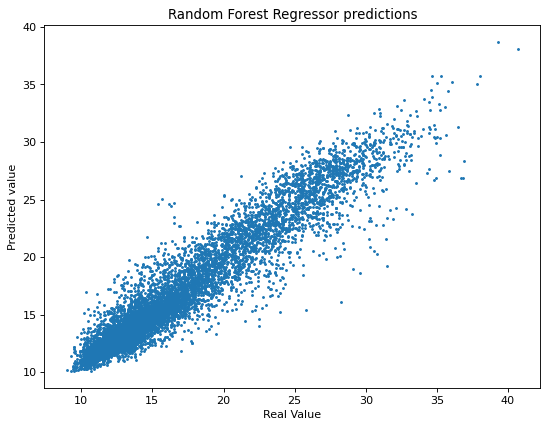

In [16]:
estimator = RandomForestRegressor(n_estimators = 700,  random_state=42).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

RandomForestMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(RandomForestMAPE)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()

# Using the same hour of the days from the past week

5.6243999541263126


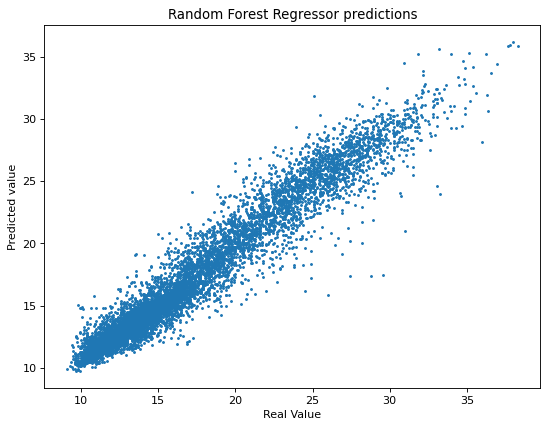

In [20]:
df = pd.read_excel("HHwithExog.xlsx")

lagNumberStart = 1
lagNumberEnd = 7

for i in range(lagNumberStart, lagNumberEnd):
    name = "n-{}.".format(48*i)
    df[name] = df['HH Electricity (kWh)'].shift(48*i)

i = list(range(lagNumberEnd*48))
df = df.drop(i)


feature_cols = ['dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']   

for i in range(lagNumberStart, lagNumberEnd):
    name = "n-{}.".format(48*i)
    feature_cols.append(name)
    
X = df[feature_cols] # Features
y = df['HH Electricity (kWh)'] # Target variable

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)


#X1,X_Validate,y1,y_validate = train_test_split(X,y,test_size=0.2,random_state=42) #split training:testing:validation 60:20:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #split training:testing 75:25

estimator = RandomForestRegressor(n_estimators = 700,  random_state=42).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

RandomForestMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(RandomForestMAPE)


figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()



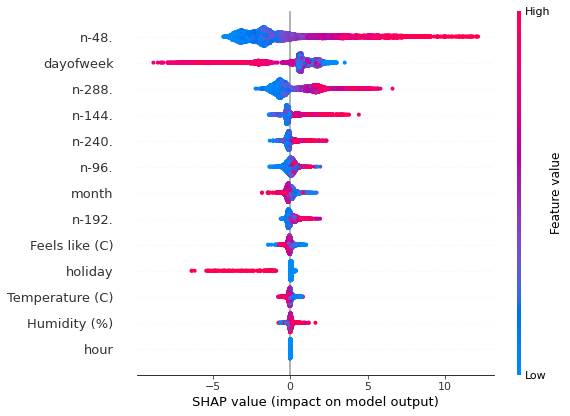

In [21]:
import shap

shap.initjs()

X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_importance)

shap.summary_plot(shap_values, X_importance)




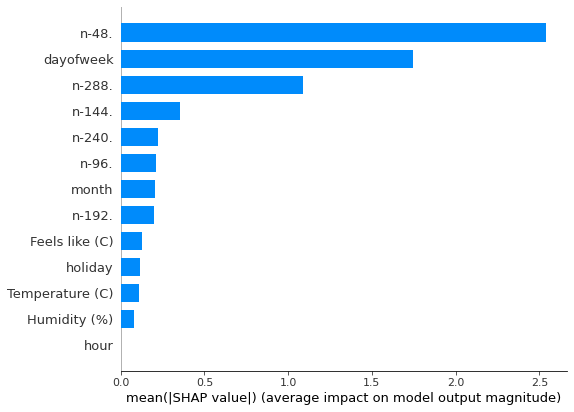

In [22]:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

5.4858858593613835


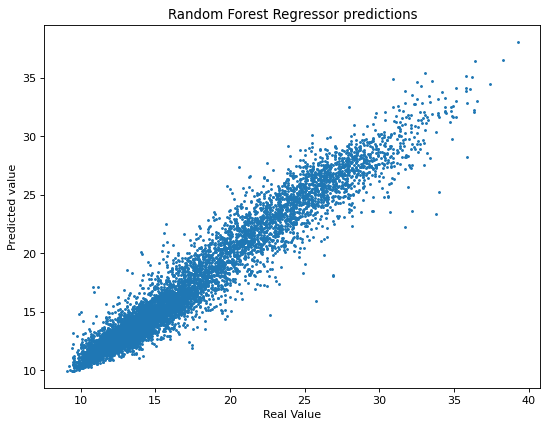

In [23]:
df = pd.read_excel("HHwithExog.xlsx")

lagNumberStart = 1
lagNumberEnd = 8

for i in range(lagNumberStart, lagNumberEnd):
    name = "n-{}.".format(48*i)
    df[name] = df['HH Electricity (kWh)'].shift(48*i)

i = list(range(lagNumberEnd*48))
df = df.drop(i)


feature_cols = ['dayofweek', 'hour', 'month', 'holiday', 'Temperature (C)', 'Feels like (C)', 'Humidity (%)']   

for i in range(lagNumberStart, lagNumberEnd):
    name = "n-{}.".format(48*i)
    feature_cols.append(name)
    
X = df[feature_cols] # Features
y = df['HH Electricity (kWh)'] # Target variable

scaler = StandardScaler() #scaling
X_scaled = scaler.fit_transform(X)


#X1,X_Validate,y1,y_validate = train_test_split(X,y,test_size=0.2,random_state=42) #split training:testing:validation 60:20:20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #split training:testing 75:25

estimator = RandomForestRegressor(n_estimators = 700,  random_state=42).fit(X_train, y_train)
y_pred = estimator.predict(X_test)

RandomForestMAPE = mean_absolute_percentage_error(y_test, y_pred) * 100
print(RandomForestMAPE)


figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test,y_pred, s = 2.5)
plt.xlabel('Real Value')
# Set the y axis label of the current axis.
plt.ylabel('Predicted value')
# Set a title of the current axes.
plt.title('Random Forest Regressor predictions')
# Display a figure.
plt.show()

In [ ]:
shap.initjs()

X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_importance)

shap.summary_plot(shap_values, X_importance)
